# De opdracht.
Twee grote tanks, elk gevuld met 100 Liter vloeistof, zijn met pijpleidingen aan elkaar verbonden. De vloeistof stroomt van tank A in tank B met een snelheid van 3 L/min en van B in A met 1 L/min. Een zoutoplossing met een concentratie van 0.2 kg/L stroomt met een snelheid van 6 L/min tank A in. De oplossing stroomt met een snelheid van 4 L/min tank A uit en verlaat met een snelheid van 2 L/min tank B. 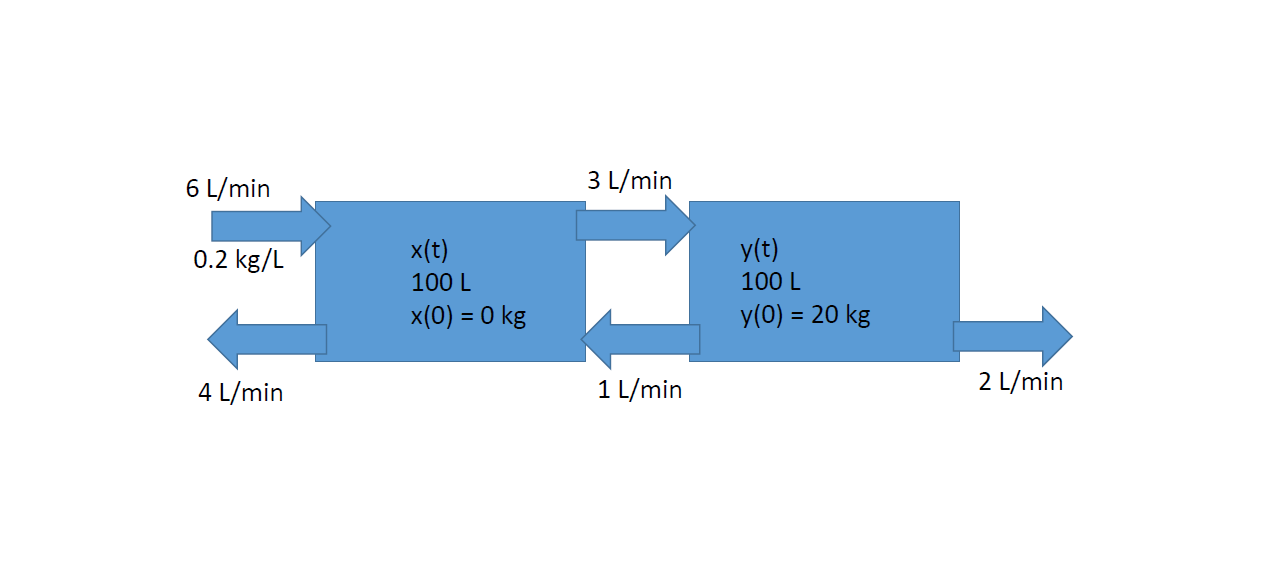

# Imports.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# De code.

### De variabele.
Hierin staan alle variabele die ik gebruikt heb voor de opdracht, de meeste van deze variabelen heb ik uit de tekst van de opdracht gepakt, bijvoorbeeld de stroming van tank A naar tank B. Ook heb ik een paar variabele gemaakt voor de schoonheid van de code, ik heb namelijk de totale bij en af van een tank in een variabele gezet inplaats van dat het versprijt staat over meerdere variabelen. Ook de looptijd van de test staat hierin, in dit geval is het 200 minuten en elke stap is één minuut en zo zijn er dus 200 stappen.

In [2]:
Begin_inhoud_tank_A = 100 # 100 L 
Begin_inhoud_tank_B = 100 # 100 L 

Begin_gehalte_tank_A = 0 # 0 KG
Begin_gehalte_tank_B = 20 # 20 KG

A_naar_B_stroming = 3 # 3 L/min
B_naar_A_stroming = 1 # 1 L/min

Invoer_zoutoplossing_tank_A = 6 # 6L/min
Concentratie_zoutoplossing_per_liter = 0.2 # 0.2 KG/L, 1.2 KG per minuut
Invoer_zoutoplossing_per_min = 1.2 # 1.2 KG

Leeglopen_tank_A = 4 # 4 L/min
Leeglopen_tank_B = 2 # 2 L/min

totaal_tank_A_bij = B_naar_A_stroming + Invoer_zoutoplossing_tank_A # de totale hoeveelheid vloeistof die de tank binnenkomt
totaal_tank_A_minder = A_naar_B_stroming + Leeglopen_tank_A # de totale hoeveelheid vloeistof die de tank verlaat

totaal_tank_B_bij = A_naar_B_stroming # de totale hoeveelheid vloeistof die de tank binnenkomt
totaal_tank_B_minder = B_naar_A_stroming + Leeglopen_tank_B # de totale hoeveelheid vloeistof die de tank verlaat

stap = 1 # minuut
Minuten_looptijd = 200 # in munten
aantal_stappen = Minuten_looptijd # De tank loopt x aantal minuten en de stappen zijn van 1 minuut dus het zijn evenveel stappen als de looptijd

### Forward euler methode.
In deze functie staan variabele die je niet hoeft te veranderen, hiermee bedoel ik dat je ze niet hoeft te verandere als je een andere antwoord wilt. Als je namelijk een test wilt draaien met andere waardes moet je de waardes in het kopje 'De variabele' veranderen. Zo is deze code herbruikbaar met alle waardes die je maar wilt, niet de standaard variabelen. Het is dus niet 'hard coded'. Je ziet dat ik vaak 'np.zeros(aantal_stappen + 1)' gebruik, wat ik daar doe is een array maken met alleen maar nullen, er zijn evenveel nullen als er aantal stappen zijn. Zo kan ik later in de for loop over deze arrays heen lopen en dan de waardes invullen.

### De berekeningen.
Alle formules op 1 na in deze vergelijk zijn hetzelfde. Wanneer er 6L water bij komt en 0.2kg/L aan zout, dan is dit een constante waarde. Bij elke andere toe/afvoer van water moet er bereking gedaan worden. Die berekening is als volgt: (De hoeveelheid water die erbij komt * de zoutconcentratie per liter van de tank waar het vandaan komt). Dat heb ik gedaan zodat daarna niet nog een keer het totale zout gehalte gedeelt hoeft te worden over de totale inhoud omdat ik dat dus al doe met delen_tank_X. zo ziet de code er nu uit: (X_naar_Y_stroming * delen_tank_X[stap]) ipv. (X_naar_Y_stroming * Gehalte_tank_X[stap] / Inhoud_tank_X[stap]). Door zulke dingen toe te voegen houd ik de code wat schoner.

In [3]:
def Forward_euler_methode():
    
    Gehalte_tank_A = np.zeros(aantal_stappen + 1)
    Gehalte_tank_A[0] = Begin_gehalte_tank_A
    
    Concentratie_zoutoplossing_tank_A = np.zeros(aantal_stappen + 1)
    Concentratie_zoutoplossing_tank_A[0] = Begin_gehalte_tank_A
    
    Inhoud_tank_A = np.zeros(aantal_stappen + 1)
    Inhoud_tank_A[0] = Begin_inhoud_tank_A
    
    delen_tank_A = np.zeros(aantal_stappen + 1)
    delen_tank_A[0] = Gehalte_tank_A[0] / Inhoud_tank_A[0]
    
    Gehalte_tank_B = np.zeros(aantal_stappen + 1)
    Gehalte_tank_B[0] = Begin_gehalte_tank_B
    
    Concentratie_zoutoplossing_tank_B = np.zeros(aantal_stappen + 1)
    Concentratie_zoutoplossing_tank_B[0] = Begin_gehalte_tank_B
    
    Inhoud_tank_B = np.zeros(aantal_stappen + 1)
    Inhoud_tank_B[0] = Begin_inhoud_tank_B
    
    delen_tank_B = np.zeros(aantal_stappen + 1)
    delen_tank_B[0] = Gehalte_tank_B[0] / Inhoud_tank_B[0]
    
    looptijd = [0]
    
    for stap in range(aantal_stappen):

        Inhoud_tank_A[stap + 1] = Inhoud_tank_A[stap] + totaal_tank_A_bij - totaal_tank_A_minder
        Concentratie_zoutoplossing_tank_A[stap + 1] = Concentratie_zoutoplossing_tank_A[stap] + (Invoer_zoutoplossing_tank_A * Concentratie_zoutoplossing_per_liter) - (Leeglopen_tank_A * delen_tank_A[stap]) + (B_naar_A_stroming * delen_tank_B[stap]) - (A_naar_B_stroming * delen_tank_A[stap]) 
        delen_tank_A[stap + 1] = Concentratie_zoutoplossing_tank_A[stap] / Inhoud_tank_A[stap]
        
        Inhoud_tank_B[stap + 1] = Inhoud_tank_B[stap] + totaal_tank_B_bij - totaal_tank_B_minder
        Concentratie_zoutoplossing_tank_B[stap + 1] = Concentratie_zoutoplossing_tank_B[stap] + (A_naar_B_stroming * delen_tank_A[stap]) - ((B_naar_A_stroming * delen_tank_B[stap]) + (Leeglopen_tank_B * delen_tank_B[stap]))
        delen_tank_B[stap + 1] = Concentratie_zoutoplossing_tank_B[stap] / Inhoud_tank_B[stap]
        
        looptijd.append(stap)
        
    return looptijd, delen_tank_A, delen_tank_B
Forward_euler_methode()

([0,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,

### Visualisatie.
De visualisatie geeft 200 stappen weer omdat dat de totale stappen zijn die ik ingevuld heb bij 'Minuten_looptijd' in het kopje 'Variabelen'. Ik heb voor 200 stappen gekozen omdat, als je meer dan dat neemt er niks meer veranderd en als je minder dan dat doet zie je het uiteindelijke resultaat niet. Ook al maak je er 1000 stappen krijg je nogsteeds 0.20 als uitkomst alleen is de grafiek dan minder goet te lezen 

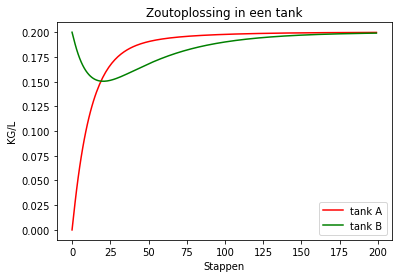

In [4]:
looptijd, delen_tank_A, delen_tank_B = Forward_euler_methode()

plt.plot(looptijd,delen_tank_A,'r',label='tank A')
plt.plot(looptijd,delen_tank_B,'g',label='tank B')

plt.title('Zoutoplossing in een tank')
plt.ylabel("KG/L")
plt.xlabel("Stappen")

plt.legend()
plt.show()